In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random
import cv2
from google.colab.patches import cv2_imshow
from tqdm.auto import tqdm
import os
import shutil as sh
from IPython.display import Image, clear_output

In [2]:
%%time

!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U pycocotools
!pip install -qr yolov5/requirements.txt  # install dependencies
!cp yolov5/requirements.txt ./

fatal: destination path 'yolov5' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
CPU times: user 77.6 ms, sys: 68.6 ms, total: 146 ms
Wall time: 6.83 s


In [3]:
img_h, img_w, num_channels = (380, 676, 3)
df = pd.read_csv('/content/drive/MyDrive/yolo_data/train_solution_bounding_boxes (1).csv')
df.rename(columns={'image':'image_id'}, inplace=True)
df['image_id'] = df['image_id'].apply(lambda x: x.split('.')[0])
df['x_center'] = (df['xmin'] + df['xmax'])/2
df['y_center'] = (df['ymin'] + df['ymax'])/2
df['w'] = df['xmax'] - df['xmin']
df['h'] = df['ymax'] - df['ymin']
df['classes'] = 0
df['x_center'] = df['x_center']/img_w
df['w'] = df['w']/img_w
df['y_center'] = df['y_center']/img_h
df['h'] = df['h']/img_h


In [4]:
df.head(10)

,image_id,xmin,ymin,xmax,ymax,x_center,y_center,w,h,classes
0,vid_4_1000,281.259045,187.035071,327.727931,223.225547,0.450434,0.539817,0.068741,0.095238,0
1,vid_4_10000,15.163531,187.035071,120.329957,236.430180,0.100217,0.557191,0.155572,0.129987,0
2,vid_4_10040,239.192475,176.764801,361.968162,236.430180,0.444645,0.543678,0.181621,0.157014,0
3,vid_4_10020,496.483358,172.363256,630.020260,231.539575,0.833213,0.531451,0.197540,0.155727,0
4,vid_4_10060,16.630970,186.546010,132.558611,238.386422,0.110347,0.559122,0.171491,0.136422,0
5,vid_4_10100,447.568741,160.625804,582.083936,232.517696,0.761577,0.517294,0.198987,0.189189,0
6,vid_4_10120,168.755427,180.677284,304.738061,246.700450,0.350217,0.562339,0.201158,0.173745,0
7,vid_4_10140,0.000000,188.991313,85.111433,249.145753,0.062952,0.576496,0.125904,0.158301,0
8,vid_4_1020,202.506512,189.480373,239.192475,229.094273,0.326700,0.550756,0.054269,0.104247,0
9,vid_4_1040,116.416787,189.969434,180.494935,229.094273,0.219609,0.551400,0.094790,0.102960,0


Image ID: vid_4_16160


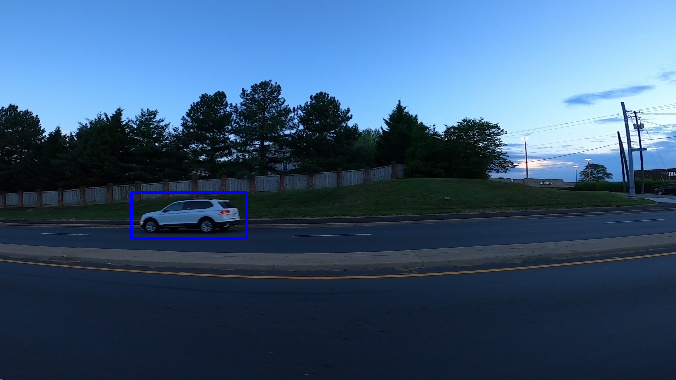

In [9]:
index = list(set(df.image_id))
i = random.choice(index)
image = i
print("Image ID: %s"%(image))
img = cv2.imread(f'/content/drive/MyDrive/yolo_data/training_images/{image}.jpg')

xmin , ymin , xmax , ymax = df[df['image_id'] == i ]['xmin'] , df[df['image_id'] == i ]['ymin'] , df[df['image_id'] == i ]['xmax'] , df[df['image_id'] == i ]['ymax']
cv2.rectangle(img , (xmin , ymin) , (xmax , ymax) , (255, 0, 0) , 2)
cv2_imshow(img)


In [16]:
source = 'training_images'
if True:
    for fold in [0]:
        val_index = index[len(index)*fold//5:len(index)*(fold+1)//5]
        for name,mini in tqdm(df.groupby('image_id')):
            if name in val_index:
                path2save = 'val2017/'
            else:
                path2save = 'train2017/'
            if not os.path.exists('/tmp/convertor/fold{}/labels/'.format(fold)+path2save):
                os.makedirs('/tmp/convertor/fold{}/labels/'.format(fold)+path2save)
            with open('/tmp/convertor/fold{}/labels/'.format(fold)+path2save+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','w','h']].astype(float).values
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write("\n")
            if not os.path.exists('/tmp/convertor/fold{}/images/{}'.format(fold,path2save)):
                os.makedirs('/tmp/convertor/fold{}/images/{}'.format(fold,path2save))
            sh.copy("/kaggle/input/car-object-detection/data/{}/{}.jpg".format(source,name),'/tmp/convertor/fold{}/images/{}/{}.jpg'.format(fold,path2save,name))

  0%|          | 0/355 [00:00<?, ?it/s]

FileNotFoundError: ignored

In [20]:
%cd yolov5
!python detect.py --source '/content/drive/MyDrive/yolo_data/training_images'

/content/yolov5
detect: weights=yolov5s.pt, source=/content/drive/MyDrive/yolo_data/training_images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-250-g6adc53b Python-3.7.13 torch-1.11.0+cu113 CPU

100% 14.1M/14.1M [00:00<00:00, 81.8MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1001 /content/drive/MyDrive/yolo_data/training_images/vid_4_1000.jpg: 384x640 1 car, Done. (0.349s)
image 2/1001 /content/drive/MyDrive/yolo_data/training_images/vid_4_10000.jpg: 384x640 1 car, Done. (0.236s)
image 3/1001 /content/drive/MyDrive/yolo_data/training_images/vid_4_10020.jpg: 384x640 1 car, Done. (0.247s)
image 

In [21]:
predicted_files = []
for (dirpath, dirnames, filenames) in os.walk("runs/detect/exp"):
    predicted_files.extend(filenames)

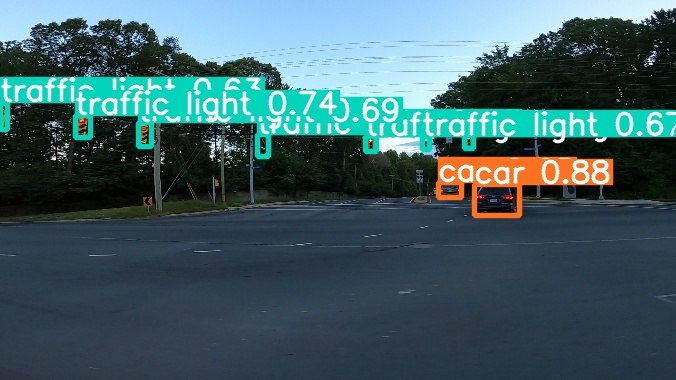

In [43]:
Image(filename=f'runs/detect/exp/{random.choice(predicted_files)}')